# Heart Disease Detection - Data Preparation (CRISP-DM Stage 1)

This notebook covers the **Data Preparation phase** of the CRISP-DM methodology for the Heart Disease Detection project.

**Data Type:** This is **tabular (cross-sectional) data**, not time-series data. Each row represents an individual survey respondent.

## Stage 1 Constraints (Allowed Operations Only)
- ✅ Basic data cleaning (handling missing values, removing duplicates)
- ✅ Basic encoding of categorical variables
- ✅ Train/test data splitting
- ✅ Feature extraction/engineering beyond basic encoding (e.g., TF-IDF, embeddings, PCA) - *relaxed*
- ❌ No hyperparameter tuning
- ❌ No deep learning or model ensembling

## Dataset Download

The dataset used in this project is the **Indicators of Heart Disease (2022 UPDATE)** from Kaggle.

📥 **Download Link:** [https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

After downloading, place the `heart_2022_with_nans.csv` file in the same directory as this notebook.

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for preprocessing and splitting
from sklearn.model_selection import train_test_split

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set random state for reproducibility (Lab02/03 best practice)
RANDOM_STATE = 42

print("Libraries imported successfully!")
print(f"Random State set to: {RANDOM_STATE}")

Libraries imported successfully!
Random State set to: 42


## 2. Load the Dataset (Data Understanding Phase)

Load the heart disease dataset and perform initial exploration to understand its structure.

In [2]:
# Load the dataset
df = pd.read_csv('heart_2022_with_nans.csv')

# Display basic information
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn Names:\n{list(df.columns)}")

DATASET OVERVIEW

Dataset Shape: 445,132 rows × 40 columns

Column Names:
['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


## Data Preparation Framework (CRISP-DM)

Following the structured DP stages from CRISP-DM:

- **DP1 – Select**: Choose features, remove IDs/leakage/noise
- **DP2 – Clean**: Handle missing/invalid values
- **DP3 – Structure**: Encode categoricals; ensure numeric inputs
- **DP4 – Construct**: Feature construction (rearrange existing information)
- **DP5 – Validate**: Split correctly; verify no data leakage

In [3]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
# Display data types and memory usage
print("\nData Types and Non-Null Counts:")
print("-" * 60)
df.info()


Data Types and Non-Null Counts:
------------------------------------------------------------
<class 'pandas.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  str    
 1   Sex                        445132 non-null  str    
 2   GeneralHealth              443934 non-null  str    
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  str    
 6   PhysicalActivities         444039 non-null  str    
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  str    
 9   HadHeartAttack             442067 non-null  str    
 10  HadAngina                  440727 non-null  str    
 11  HadStroke                  443575 non-null  str    
 12  Had

In [5]:
# Identify column types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()

print("\n" + "=" * 60)
print("COLUMN TYPE SUMMARY")
print("=" * 60)
print(f"\nNumerical Columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")

print(f"\nCategorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}")


COLUMN TYPE SUMMARY

Numerical Columns (6):
  - PhysicalHealthDays
  - MentalHealthDays
  - SleepHours
  - HeightInMeters
  - WeightInKilograms
  - BMI

Categorical Columns (34):
  - State
  - Sex
  - GeneralHealth
  - LastCheckupTime
  - PhysicalActivities
  - RemovedTeeth
  - HadHeartAttack
  - HadAngina
  - HadStroke
  - HadAsthma
  - HadSkinCancer
  - HadCOPD
  - HadDepressiveDisorder
  - HadKidneyDisease
  - HadArthritis
  - HadDiabetes
  - DeafOrHardOfHearing
  - BlindOrVisionDifficulty
  - DifficultyConcentrating
  - DifficultyWalking
  - DifficultyDressingBathing
  - DifficultyErrands
  - SmokerStatus
  - ECigaretteUsage
  - ChestScan
  - RaceEthnicityCategory
  - AgeCategory
  - AlcoholDrinkers
  - HIVTesting
  - FluVaxLast12
  - PneumoVaxEver
  - TetanusLast10Tdap
  - HighRiskLastYear
  - CovidPos


### Data Understanding: Variable Roles and Types

Based on inspection, here is the classification of each variable:

| Column | Role | Type | Notes |
|--------|------|------|-------|
| State | Metadata | Categorical (nominal) | Geographic context, high cardinality |
| Sex | Feature | Categorical (nominal) | Binary |
| GeneralHealth | Feature | Categorical (ordinal) | Self-reported health status |
| PhysicalHealthDays | Feature | Numerical (discrete) | Days of poor health (0-30) |
| MentalHealthDays | Feature | Numerical (discrete) | Days of poor mental health (0-30) |
| LastCheckupTime | Feature | Categorical (ordinal) | Time since last checkup |
| PhysicalActivities | Feature | Categorical (nominal) | Binary (Yes/No) |
| SleepHours | Feature | Numerical (discrete) | Hours of sleep |
| RemovedTeeth | Feature | Categorical (ordinal) | Dental health indicator |
| **HadHeartAttack** | **Target** | Categorical (nominal) | **Binary - prediction target** |
| HadAngina | Feature | Categorical (nominal) | Binary - related condition |
| HadStroke | Feature | Categorical (nominal) | Binary |
| HadAsthma | Feature | Categorical (nominal) | Binary |
| HadSkinCancer | Feature | Categorical (nominal) | Binary |
| HadCOPD | Feature | Categorical (nominal) | Binary |
| HadDepressiveDisorder | Feature | Categorical (nominal) | Binary |
| HadKidneyDisease | Feature | Categorical (nominal) | Binary |
| HadArthritis | Feature | Categorical (nominal) | Binary |
| HadDiabetes | Feature | Categorical (nominal) | Multi-category |
| DeafOrHardOfHearing | Feature | Categorical (nominal) | Binary |
| BlindOrVisionDifficulty | Feature | Categorical (nominal) | Binary |
| DifficultyConcentrating | Feature | Categorical (nominal) | Binary |
| DifficultyWalking | Feature | Categorical (nominal) | Binary |
| DifficultyDressingBathing | Feature | Categorical (nominal) | Binary |
| DifficultyErrands | Feature | Categorical (nominal) | Binary |
| SmokerStatus | Feature | Categorical (nominal) | Multi-category |
| ECigaretteUsage | Feature | Categorical (nominal) | Multi-category |
| ChestScan | Feature | Categorical (nominal) | Binary |
| RaceEthnicityCategory | Feature | Categorical (nominal) | Multi-category |
| AgeCategory | Feature | Categorical (ordinal) | Age ranges |
| HeightInMeters | Feature | Numerical (continuous) | Physical measurement |
| WeightInKilograms | Feature | Numerical (continuous) | Physical measurement |
| BMI | Feature | Numerical (continuous) | Derived from height/weight |
| AlcoholDrinkers | Feature | Categorical (nominal) | Binary |
| HIVTesting | Feature | Categorical (nominal) | Binary |
| FluVaxLast12 | Feature | Categorical (nominal) | Binary |
| PneumoVaxEver | Feature | Categorical (nominal) | Binary |
| TetanusLast10Tdap | Feature | Categorical (nominal) | Multi-category |
| HighRiskLastYear | Feature | Categorical (nominal) | Binary |
| CovidPos | Feature | Categorical (nominal) | Multi-category |

**Potential Leakage Concerns:**
- `HadAngina` - closely related to heart disease, may cause leakage
- `BMI` - derived from Height and Weight (redundant information)

## DP1 – Select: Define Target and Initial Feature Scope

- **Target:** `HadHeartAttack`
- **Initial features:** all remaining columns (feature selection and de‑leakage are handled explicitly in DP4)
- **Rationale:** We start broad, then remove leakage / redundancy in a controlled, documented step.

## DP5 – Validate: Train/Test Split FIRST (Prevent Data Leakage)

**CRITICAL (from Lab03):** We must split the data BEFORE any preprocessing to prevent data leakage.

> "If you compute imputations/encodings on all data, you leak information from test into train and inflate the metric."

**Why this matters:**
- Computing median/mode on the full dataset means training data "knows" about test set distribution
- This artificially inflates evaluation metrics
- The model appears to perform better than it actually would on truly unseen data

**Correct order:**
1. Split raw data first (with missing values)
2. Compute imputation statistics ONLY from training set
3. Apply those statistics to both train and test sets

In [6]:
# First, convert empty strings and whitespace to NaN (Lab01 best practice)
df = df.replace(r'^\s*$', np.nan, regex=True)

# Store original shape before any modifications
original_shape = df.shape

# Check for missing values (for documentation only - we will handle after split)
print("=" * 60)
print("MISSING VALUES ANALYSIS (Before Split)")
print("=" * 60)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a summary dataframe
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})

# Filter only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values(
    by='Missing Percentage', ascending=False
)

if len(missing_summary) > 0:
    print(f"\nColumns with Missing Values ({len(missing_summary)} columns):\n")
    print(missing_summary.head(10).to_string())  # Show top 10
    print(f"\nTotal rows with at least one missing value: {df.isnull().any(axis=1).sum():,}")
else:
    print("\n✓ No missing values found in the dataset!")

MISSING VALUES ANALYSIS (Before Split)

Columns with Missing Values (38 columns):

                   Missing Count  Missing Percentage
TetanusLast10Tdap          82516               18.54
PneumoVaxEver              77040               17.31
HIVTesting                 66127               14.86
ChestScan                  56046               12.59
CovidPos                   50764               11.40
HighRiskLastYear           50623               11.37
BMI                        48806               10.96
FluVaxLast12               47121               10.59
AlcoholDrinkers            46574               10.46
WeightInKilograms          42078                9.45

Total rows with at least one missing value: 199,110


In [7]:
# Define target variable BEFORE splitting
target_col = 'HadHeartAttack'

# Separate features and target (with missing values still present)
X_raw = df.drop(columns=[target_col])
y_raw = df[target_col]

print("=" * 60)
print("TRAIN/TEST SPLIT (Before Preprocessing)")
print("=" * 60)

# Split parameters
TEST_SIZE = 0.2

# First, we need to handle missing values in target for splitting
# Drop rows where target is missing (can't stratify on NaN)
valid_mask = y_raw.notna()
X_raw = X_raw[valid_mask]
y_raw = y_raw[valid_mask]
print(f"\nDropped {(~valid_mask).sum():,} rows with missing target values")

# Perform stratified split on RAW data (with missing values in features)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=y_raw
)

print(f"\nSplit Parameters:")
print(f"  - Test Size: {TEST_SIZE * 100:.0f}%")
print(f"  - Random State: {RANDOM_STATE}")
print(f"  - Stratified: Yes")

print(f"\nTraining Set (raw): {X_train_raw.shape}")
print(f"Test Set (raw): {X_test_raw.shape}")

TRAIN/TEST SPLIT (Before Preprocessing)

Dropped 3,065 rows with missing target values

Split Parameters:
  - Test Size: 20%
  - Random State: 42
  - Stratified: Yes

Training Set (raw): (353653, 39)
Test Set (raw): (88414, 39)


## DP2 – Clean: Handle Missing Values (Train-Only Imputation)

Missing values are handled after the split to prevent leakage. Numeric features use median and categorical features use mode, both computed on the training set only.

In [8]:
# DP2 - Clean: Handle missing values (fit on TRAIN only, apply to both)
print("=" * 60)
print("HANDLING MISSING VALUES (No Data Leakage)")
print("=" * 60)
print("\n⚠ Computing imputation statistics from TRAINING SET ONLY")

# Create copies for processing
X_train_clean = X_train_raw.copy()
X_test_clean = X_test_raw.copy()

# Identify column types from training set
numerical_cols = X_train_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train_clean.select_dtypes(include=['object', 'string']).columns.tolist()

# Store imputation values (computed from training set only)
imputation_values = {}

# Handle missing values in numerical columns (median from TRAIN only)
print("\n--- Numerical Columns (Median from Training Set) ---")
for col in numerical_cols:
    if X_train_raw[col].isnull().sum() > 0 or X_test_raw[col].isnull().sum() > 0:
        # Compute median from TRAINING data only
        median_val = X_train_clean[col].median()
        imputation_values[col] = median_val
        
        # Apply to both train and test
        train_missing = X_train_clean[col].isnull().sum()
        test_missing = X_test_clean[col].isnull().sum()
        
        X_train_clean[col] = X_train_clean[col].fillna(median_val)
        X_test_clean[col] = X_test_clean[col].fillna(median_val)
        
        print(f"  - {col}: median={median_val:.2f} (train imputed: {train_missing:,}, test imputed: {test_missing:,})")

# Handle missing values in categorical columns (mode from TRAIN only)
print("\n--- Categorical Columns (Mode from Training Set) ---")
for col in categorical_cols:
    if X_train_raw[col].isnull().sum() > 0 or X_test_raw[col].isnull().sum() > 0:
        # Compute mode from TRAINING data only
        mode_val = X_train_clean[col].mode()[0]
        imputation_values[col] = mode_val
        
        # Apply to both train and test
        train_missing = X_train_clean[col].isnull().sum()
        test_missing = X_test_clean[col].isnull().sum()
        
        X_train_clean[col] = X_train_clean[col].fillna(mode_val)
        X_test_clean[col] = X_test_clean[col].fillna(mode_val)
        
        print(f"  - {col}: mode='{mode_val}' (train imputed: {train_missing:,}, test imputed: {test_missing:,})")

# Verify no missing values remain
print(f"\nRemaining missing values - Train: {X_train_clean.isnull().sum().sum()}, Test: {X_test_clean.isnull().sum().sum()}")
print("✓ Missing value handling complete (no data leakage)!")

HANDLING MISSING VALUES (No Data Leakage)

⚠ Computing imputation statistics from TRAINING SET ONLY

--- Numerical Columns (Median from Training Set) ---
  - PhysicalHealthDays: median=0.00 (train imputed: 8,456, test imputed: 2,141)
  - MentalHealthDays: median=0.00 (train imputed: 7,012, test imputed: 1,780)
  - SleepHours: median=7.00 (train imputed: 4,120, test imputed: 1,076)
  - HeightInMeters: median=1.70 (train imputed: 22,478, test imputed: 5,663)
  - WeightInKilograms: median=80.74 (train imputed: 33,154, test imputed: 8,312)
  - BMI: median=27.44 (train imputed: 38,430, test imputed: 9,680)

--- Categorical Columns (Mode from Training Set) ---
  - GeneralHealth: mode='Very good' (train imputed: 888, test imputed: 207)
  - LastCheckupTime: mode='Within past year (anytime less than 12 months ago)' (train imputed: 6,426, test imputed: 1,615)
  - PhysicalActivities: mode='Yes' (train imputed: 767, test imputed: 205)
  - RemovedTeeth: mode='None of them' (train imputed: 8,820, te

### Rationale: Imputation Choices

- **Numerical → median**: Many health-related numeric fields (e.g., days of poor health, sleep hours) are skewed and can contain outliers. The median is robust to outliers and better preserves the typical respondent profile than the mean.
- **Categorical → mode**: The most frequent category is a natural, information-preserving replacement that avoids introducing unseen labels.

**Leakage control:** All imputation statistics are computed from the training set only, then applied to both train and test to prevent information bleed.

## DP2 – Clean: Remove Duplicate Records

Check for and remove any duplicate rows in the training and test sets separately.

In [9]:
# Check for duplicate records in training set only
# (We don't remove duplicates from test set to preserve its integrity as "unseen" data)
print("=" * 60)
print("DUPLICATE RECORDS ANALYSIS")
print("=" * 60)

# Check training set
train_duplicate_count = X_train_clean.duplicated().sum()
print(f"\nTraining Set:")
print(f"  - Duplicate rows: {train_duplicate_count:,}")
print(f"  - Percentage: {(train_duplicate_count / len(X_train_clean)) * 100:.2f}%")

if train_duplicate_count > 0:
    # Get indices of duplicates
    dup_indices = X_train_clean[X_train_clean.duplicated()].index
    X_train_clean = X_train_clean.drop_duplicates()
    y_train = y_train.drop(dup_indices)
    print(f"  ✓ Removed {train_duplicate_count:,} duplicate rows from training set")

# Check test set (report only, don't remove)
test_duplicate_count = X_test_clean.duplicated().sum()
print(f"\nTest Set:")
print(f"  - Duplicate rows: {test_duplicate_count:,}")
print(f"  - Note: Duplicates NOT removed from test set to preserve evaluation integrity")

print(f"\nFinal shapes - Train: {X_train_clean.shape}, Test: {X_test_clean.shape}")

DUPLICATE RECORDS ANALYSIS

Training Set:
  - Duplicate rows: 222
  - Percentage: 0.06%
  ✓ Removed 222 duplicate rows from training set

Test Set:
  - Duplicate rows: 14
  - Note: Duplicates NOT removed from test set to preserve evaluation integrity

Final shapes - Train: (353431, 39), Test: (88414, 39)


## DP2 – Clean: Remove Impossible / Abnormal Values

Rows with values outside domain-valid ranges are **removed** from the training set (not clipped), as they likely represent data entry errors or measurement anomalies.

Exclusion criteria (based on domain knowledge):
- **SleepHours**: < 0 or > 24 (impossible)
- **HeightInMeters**: < 1.0 m or > 2.5 m (implausible adult height)
- **BMI**: < 10 or > 60 (medically extreme / likely erroneous)

**Note:** Rows are removed from the **training set only**. Test set rows with abnormal values are clipped to bounds to preserve evaluation integrity (no row deletion from test).

In [10]:
# DP2 - Clean: Remove rows with impossible/abnormal values
print("=" * 60)
print("IMPOSSIBLE / ABNORMAL VALUES CHECK")
print("=" * 60)

# Define exclusion criteria based on domain knowledge
exclusion_rules = {
    'SleepHours': (0, 24),       # impossible outside this range
    'HeightInMeters': (1.0, 2.5),  # implausible adult height
    'BMI': (10, 60),             # medically extreme / likely erroneous
}

# --- Training set: DROP rows with abnormal values ---
print("\n--- Training Set (rows removed) ---")
train_before = len(X_train_clean)

for col, (low, high) in exclusion_rules.items():
    if col in X_train_clean.columns:
        abnormal_mask = (X_train_clean[col] < low) | (X_train_clean[col] > high)
        n_abnormal = abnormal_mask.sum()
        if n_abnormal > 0:
            # Drop from both X and y
            X_train_clean = X_train_clean[~abnormal_mask]
            y_train = y_train.loc[X_train_clean.index]
            print(f"  {col} outside [{low}, {high}]: {n_abnormal:,} rows removed")
        else:
            print(f"  {col}: ✓ all values within [{low}, {high}]")

train_after = len(X_train_clean)
print(f"\n  Total rows removed from training set: {train_before - train_after:,}")
print(f"  Training set: {train_before:,} → {train_after:,}")

# --- Test set: CLIP abnormal values (preserve row count for evaluation) ---
print("\n--- Test Set (values clipped, rows preserved) ---")
for col, (low, high) in exclusion_rules.items():
    if col in X_test_clean.columns:
        test_abnormal = ((X_test_clean[col] < low) | (X_test_clean[col] > high)).sum()
        if test_abnormal > 0:
            X_test_clean[col] = X_test_clean[col].clip(low, high)
            print(f"  {col}: {test_abnormal:,} values clipped to [{low}, {high}]")
        else:
            print(f"  {col}: ✓ all values within [{low}, {high}]")

print(f"\n  Test set rows: {len(X_test_clean):,} (unchanged)")
print("\n✓ Abnormal value handling complete")

IMPOSSIBLE / ABNORMAL VALUES CHECK

--- Training Set (rows removed) ---
  SleepHours: ✓ all values within [0, 24]
  HeightInMeters outside [1.0, 2.5]: 28 rows removed
  BMI outside [10, 60]: 576 rows removed

  Total rows removed from training set: 604
  Training set: 353,431 → 352,827

--- Test Set (values clipped, rows preserved) ---
  SleepHours: ✓ all values within [0, 24]
  HeightInMeters: 3 values clipped to [1.0, 2.5]
  BMI: 144 values clipped to [10, 60]

  Test set rows: 88,414 (unchanged)

✓ Abnormal value handling complete


## DP4 – Construct: Feature Reduction / De-leakage (Stage 1 allowed)

Stage 1 now allows feature construction beyond basic encoding. We still keep changes **simple and interpretable**:

**Feature construction (new, derived):**
- **`PoorHealthDaysTotal = PhysicalHealthDays + MentalHealthDays`** to summarise total unhealthy days.

**Feature reduction (remove risk/noise):**
- **`HadAngina`**: clinically adjacent to the target → likely leakage.
- **`State`**: high-cardinality metadata → heavy one-hot expansion with weak causal link.
- **`HeightInMeters`** and **`WeightInKilograms`**: redundant when **`BMI`** is retained.

(Choices are documented and reversible if later modeling indicates otherwise.)

In [11]:
# DP4 - Construct: feature engineering + remove leakage/redundant/high-cardinality features (train/test)
print("=" * 60)
print("DP4 FEATURE CONSTRUCTION / REDUCTION")
print("=" * 60)

# Feature construction (simple, interpretable, derived from existing info)
if 'PhysicalHealthDays' in X_train_clean.columns and 'MentalHealthDays' in X_train_clean.columns:
    X_train_clean['PoorHealthDaysTotal'] = X_train_clean['PhysicalHealthDays'] + X_train_clean['MentalHealthDays']
    X_test_clean['PoorHealthDaysTotal'] = X_test_clean['PhysicalHealthDays'] + X_test_clean['MentalHealthDays']
    print("Created: PoorHealthDaysTotal")

# Define columns to drop (if present)
drop_cols = []

# Potential leakage / metadata
if 'HadAngina' in X_train_clean.columns:
    drop_cols.append('HadAngina')
if 'State' in X_train_clean.columns:
    drop_cols.append('State')

# Redundancy: keep BMI, drop height/weight when BMI exists
if 'BMI' in X_train_clean.columns:
    for col in ['HeightInMeters', 'WeightInKilograms']:
        if col in X_train_clean.columns:
            drop_cols.append(col)

# Drop from both train and test
if len(drop_cols) > 0:
    X_train_clean = X_train_clean.drop(columns=drop_cols)
    X_test_clean = X_test_clean.drop(columns=drop_cols)
    print(f"Dropped columns: {drop_cols}")
else:
    print("No columns dropped in DP4")

print(f"Shapes after DP4 - Train: {X_train_clean.shape}, Test: {X_test_clean.shape}")

DP4 FEATURE CONSTRUCTION / REDUCTION
Created: PoorHealthDaysTotal
Dropped columns: ['HadAngina', 'State', 'HeightInMeters', 'WeightInKilograms']
Shapes after DP4 - Train: (352827, 36), Test: (88414, 36)


## DP3 – Structure: Encode Categorical Variables

Apply basic encoding to categorical variables:
- **Label Encoding**: For binary categorical variables (Yes/No, Male/Female)
- **One-Hot Encoding**: For nominal categorical variables with multiple categories

**Important:** Encoding is fitted on training set only, then applied to both sets.

In [12]:
# Analyze categorical variables in training set
print("=" * 60)
print("CATEGORICAL VARIABLE ANALYSIS (Training Set)")
print("=" * 60)

# Update categorical columns list from training set
categorical_cols = X_train_clean.select_dtypes(include=['object', 'string']).columns.tolist()

print(f"\nCategorical columns to encode: {len(categorical_cols)}\n")

# Display unique values for each categorical column (from training set)
for col in categorical_cols:
    unique_vals = X_train_clean[col].unique()
    print(f"\n{col}:")
    print(f"  Unique values ({len(unique_vals)}): {list(unique_vals)[:10]}", end="")
    if len(unique_vals) > 10:
        print(f" ... and {len(unique_vals) - 10} more")

CATEGORICAL VARIABLE ANALYSIS (Training Set)

Categorical columns to encode: 31


Sex:
  Unique values (2): ['Female', 'Male']
GeneralHealth:
  Unique values (5): ['Fair', 'Very good', 'Poor', 'Excellent', 'Good']
LastCheckupTime:
  Unique values (4): ['Within past year (anytime less than 12 months ago)', 'Within past 5 years (2 years but less than 5 years ago)', 'Within past 2 years (1 year but less than 2 years ago)', '5 or more years ago']
PhysicalActivities:
  Unique values (2): ['Yes', 'No']
RemovedTeeth:
  Unique values (4): ['6 or more, but not all', 'None of them', '1 to 5', 'All']
HadStroke:
  Unique values (2): ['No', 'Yes']
HadAsthma:
  Unique values (2): ['No', 'Yes']
HadSkinCancer:
  Unique values (2): ['No', 'Yes']
HadCOPD:
  Unique values (2): ['Yes', 'No']
HadDepressiveDisorder:
  Unique values (2): ['Yes', 'No']
HadKidneyDisease:
  Unique values (2): ['No', 'Yes']
HadArthritis:
  Unique values (2): ['Yes', 'No']
HadDiabetes:
  Unique values (4): ['No', 'Yes', 'No, pre-

In [13]:
# Encode categorical variables (fit on TRAIN, apply to both)
print("=" * 60)
print("ENCODING CATEGORICAL VARIABLES (No Data Leakage)")
print("=" * 60)

# Identify binary and multi-category columns from training set
binary_cols = []
multi_category_cols = []

for col in categorical_cols:
    if X_train_clean[col].nunique() == 2:
        binary_cols.append(col)
    else:
        multi_category_cols.append(col)

print(f"\nBinary columns (Label Encoding): {len(binary_cols)}")
print(f"Multi-category columns (One-Hot Encoding): {len(multi_category_cols)}")

# Label encoding for binary columns (train-fit mapping, safe for unseen categories)
print("\n--- Label Encoding (Binary Columns) ---")
encoding_mapping = {}

for col in binary_cols:
    train_unique = sorted(X_train_clean[col].dropna().unique())
    mapping = {cls: idx for idx, cls in enumerate(train_unique)}
    encoding_mapping[col] = mapping
    
    # Track unseen categories in test set
    test_unique = set(X_test_clean[col].dropna().unique())
    unseen = test_unique - set(mapping.keys())
    if len(unseen) > 0:
        print(f"  ⚠ {col}: unseen categories in test -> mapped to -1: {sorted(list(unseen))}")
    
    # Apply mapping
    X_train_clean[col] = X_train_clean[col].map(mapping).fillna(-1).astype(int)
    X_test_clean[col] = X_test_clean[col].map(mapping).fillna(-1).astype(int)
    
    print(f"  {col}: {mapping}")

ENCODING CATEGORICAL VARIABLES (No Data Leakage)

Binary columns (Label Encoding): 21
Multi-category columns (One-Hot Encoding): 10

--- Label Encoding (Binary Columns) ---
  Sex: {'Female': 0, 'Male': 1}
  PhysicalActivities: {'No': 0, 'Yes': 1}
  HadStroke: {'No': 0, 'Yes': 1}
  HadAsthma: {'No': 0, 'Yes': 1}
  HadSkinCancer: {'No': 0, 'Yes': 1}
  HadCOPD: {'No': 0, 'Yes': 1}
  HadDepressiveDisorder: {'No': 0, 'Yes': 1}
  HadKidneyDisease: {'No': 0, 'Yes': 1}
  HadArthritis: {'No': 0, 'Yes': 1}
  DeafOrHardOfHearing: {'No': 0, 'Yes': 1}
  BlindOrVisionDifficulty: {'No': 0, 'Yes': 1}
  DifficultyConcentrating: {'No': 0, 'Yes': 1}
  DifficultyWalking: {'No': 0, 'Yes': 1}
  DifficultyDressingBathing: {'No': 0, 'Yes': 1}
  DifficultyErrands: {'No': 0, 'Yes': 1}
  ChestScan: {'No': 0, 'Yes': 1}
  AlcoholDrinkers: {'No': 0, 'Yes': 1}
  HIVTesting: {'No': 0, 'Yes': 1}
  FluVaxLast12: {'No': 0, 'Yes': 1}
  PneumoVaxEver: {'No': 0, 'Yes': 1}
  HighRiskLastYear: {'No': 0, 'Yes': 1}


In [14]:
# One-Hot Encoding for multi-category columns
print("\n--- One-Hot Encoding (Multi-Category Columns) ---")

if len(multi_category_cols) > 0:
    # Get all unique categories from TRAINING set only
    # This ensures test set won't have categories not seen in training
    
    # Combine train and test, then apply get_dummies
    # But we need to ensure consistent columns
    
    for col in multi_category_cols:
        # Get dummies for training set
        train_dummies = pd.get_dummies(X_train_clean[col], prefix=col)
        test_dummies = pd.get_dummies(X_test_clean[col], prefix=col)
        
        # Ensure test has same columns as train (add missing, remove extra)
        for c in train_dummies.columns:
            if c not in test_dummies.columns:
                test_dummies[c] = 0
        test_dummies = test_dummies[train_dummies.columns]  # Reorder and keep only train columns
        
        # Drop original column and add dummies
        X_train_clean = X_train_clean.drop(columns=[col])
        X_test_clean = X_test_clean.drop(columns=[col])
        
        X_train_clean = pd.concat([X_train_clean, train_dummies], axis=1)
        X_test_clean = pd.concat([X_test_clean, test_dummies], axis=1)
        
        print(f"  {col}: Created {len(train_dummies.columns)} dummy columns")
else:
    print("  No multi-category columns to encode.")

print(f"\n✓ Encoding complete!")
print(f"Training set shape: {X_train_clean.shape}")
print(f"Test set shape: {X_test_clean.shape}")


--- One-Hot Encoding (Multi-Category Columns) ---
  GeneralHealth: Created 5 dummy columns
  LastCheckupTime: Created 4 dummy columns
  RemovedTeeth: Created 4 dummy columns
  HadDiabetes: Created 4 dummy columns
  SmokerStatus: Created 4 dummy columns
  ECigaretteUsage: Created 4 dummy columns
  RaceEthnicityCategory: Created 5 dummy columns
  AgeCategory: Created 13 dummy columns
  TetanusLast10Tdap: Created 4 dummy columns
  CovidPos: Created 3 dummy columns

✓ Encoding complete!
Training set shape: (352827, 76)
Test set shape: (88414, 76)


### Rationale: Encoding Choices

- **Binary categoricals → label encoding**: compact representation for two-category variables (e.g., Yes/No, Male/Female).
- **Multi-category → one-hot**: avoids imposing artificial order on nominal variables.
- **Ordinal fields** (e.g., `GeneralHealth`, `AgeCategory`, `LastCheckupTime`) are currently treated as nominal with one-hot. If ordinal encoding is desired, swap to ordered integer mapping in a later revision.

**Safety note:** Encoders are fit on training data only. Any unseen binary category in test is mapped to `-1` to avoid errors and to keep test handling explicit.

## 6. Finalize Train/Test Sets

Assign final variable names for modeling.

In [15]:
# Finalize variable names for modeling
print("=" * 60)
print("FINAL DATASET SUMMARY")
print("=" * 60)

# Assign final names
X_train = X_train_clean
X_test = X_test_clean
# y_train and y_test already defined

print(f"\nTarget Variable: '{target_col}'")

print(f"\nFeature Matrix (X):")
print(f"  - Training: {X_train.shape}")
print(f"  - Test: {X_test.shape}")
print(f"  - Total features: {X_train.shape[1]}")

print(f"\nTarget Vector (y):")
print(f"  - Training: {y_train.shape}")
print(f"  - Test: {y_test.shape}")

FINAL DATASET SUMMARY

Target Variable: 'HadHeartAttack'

Feature Matrix (X):
  - Training: (352827, 76)
  - Test: (88414, 76)
  - Total features: 76

Target Vector (y):
  - Training: (352827,)
  - Test: (88414,)


In [16]:
# Class distribution analysis
print("\n--- Class Distribution ---")

print(f"\nTraining Set:")
print(y_train.value_counts())
print(f"\nClass proportions:")
print((y_train.value_counts(normalize=True) * 100).round(2).astype(str) + '%')

print(f"\nTest Set:")
print(y_test.value_counts())
print(f"\nClass proportions:")
print((y_test.value_counts(normalize=True) * 100).round(2).astype(str) + '%')


--- Class Distribution ---

Training Set:
HadHeartAttack
No     332781
Yes     20046
Name: count, dtype: int64

Class proportions:
HadHeartAttack
No     94.32%
Yes     5.68%
Name: proportion, dtype: str

Test Set:
HadHeartAttack
No     83392
Yes     5022
Name: count, dtype: int64

Class proportions:
HadHeartAttack
No     94.32%
Yes     5.68%
Name: proportion, dtype: str


## DP5 – Validate: Verification Checks

Perform sanity checks to verify the data preparation was successful and no data leakage occurred.

In [17]:
# Verification checks
print("=" * 60)
print("DATA PREPARATION VERIFICATION")
print("=" * 60)

# 1. Class Distribution Comparison (stratification check)
print("\n--- Stratification Check ---")
train_dist = y_train.value_counts(normalize=True) * 100
test_dist = y_test.value_counts(normalize=True) * 100

print(f"\nTraining Set ({len(y_train):,} samples):")
for cls, pct in train_dist.items():
    print(f"  Class {cls}: {pct:.2f}%")

print(f"\nTest Set ({len(y_test):,} samples):")
for cls, pct in test_dist.items():
    print(f"  Class {cls}: {pct:.2f}%")

max_diff = abs(train_dist - test_dist).max()
print(f"\nMaximum class proportion difference: {max_diff:.4f}%")
if max_diff < 1:
    print("✓ Stratification successful - class distributions preserved")

DATA PREPARATION VERIFICATION

--- Stratification Check ---

Training Set (352,827 samples):
  Class No: 94.32%
  Class Yes: 5.68%

Test Set (88,414 samples):
  Class No: 94.32%
  Class Yes: 5.68%

Maximum class proportion difference: 0.0014%
✓ Stratification successful - class distributions preserved


In [18]:
# 2. Data Leakage Check
print("\n--- Data Leakage Check ---")
train_indices = set(X_train.index)
test_indices = set(X_test.index)
overlap = train_indices.intersection(test_indices)

if len(overlap) == 0:
    print("✓ No overlapping samples between train and test sets")
else:
    print(f"⚠ WARNING: {len(overlap)} samples appear in both train and test sets!")

# 3. Missing Values Check
print("\n--- Missing Values Check ---")
train_missing = X_train.isnull().sum().sum() + y_train.isnull().sum()
test_missing = X_test.isnull().sum().sum() + y_test.isnull().sum()

if train_missing == 0 and test_missing == 0:
    print("✓ No missing values in train or test sets")
else:
    print(f"⚠ Missing values found - Train: {train_missing}, Test: {test_missing}")

# 4. Feature Consistency Check
print("\n--- Feature Consistency Check ---")
if list(X_train.columns) == list(X_test.columns):
    print("✓ Train and test sets have identical feature columns")
else:
    print("⚠ WARNING: Feature columns differ between train and test!")


--- Data Leakage Check ---
✓ No overlapping samples between train and test sets

--- Missing Values Check ---
✓ No missing values in train or test sets

--- Feature Consistency Check ---
✓ Train and test sets have identical feature columns


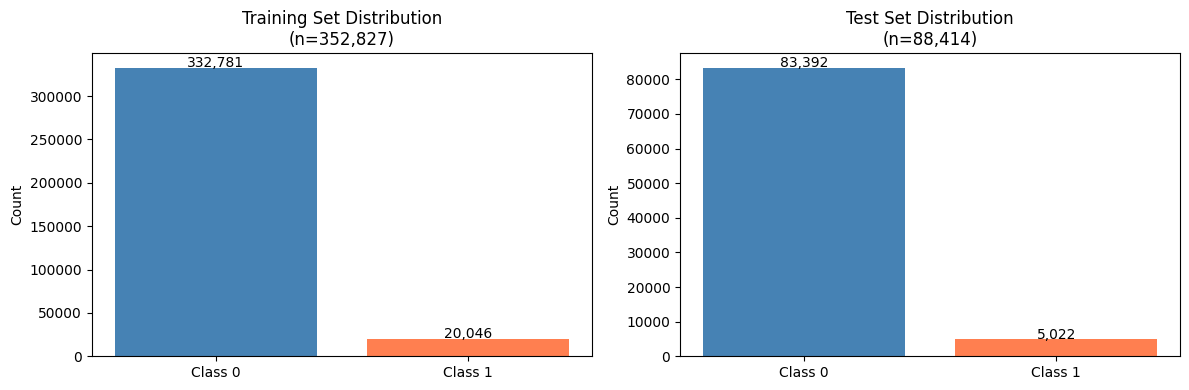

In [19]:
# Visualize class distribution in train/test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Training set
axes[0].bar(['Class 0', 'Class 1'], y_train.value_counts().sort_index(), color=['steelblue', 'coral'])
axes[0].set_title(f'Training Set Distribution\n(n={len(y_train):,})')
axes[0].set_ylabel('Count')
for i, v in enumerate(y_train.value_counts().sort_index()):
    axes[0].text(i, v + 500, f'{v:,}', ha='center')

# Test set
axes[1].bar(['Class 0', 'Class 1'], y_test.value_counts().sort_index(), color=['steelblue', 'coral'])
axes[1].set_title(f'Test Set Distribution\n(n={len(y_test):,})')
axes[1].set_ylabel('Count')
for i, v in enumerate(y_test.value_counts().sort_index()):
    axes[1].text(i, v + 100, f'{v:,}', ha='center')

plt.tight_layout()
plt.show()

In [20]:
# Save prepared data for baseline modelling
print("=" * 60)
print("SAVING PREPARED DATA")
print("=" * 60)

# Save to CSV files for use in baseline modelling phase
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("\n✓ Data saved successfully:")
print("  - X_train.csv")
print("  - X_test.csv")  
print("  - y_train.csv")
print("  - y_test.csv")

SAVING PREPARED DATA

✓ Data saved successfully:
  - X_train.csv
  - X_test.csv
  - y_train.csv
  - y_test.csv


## 9. Data Preparation Summary

Summary of all data preparation steps performed (Stage 1 compliant).

In [21]:
# Final summary
print("=" * 60)
print("DATA PREPARATION SUMMARY (CRISP-DM DP Framework)")
print("=" * 60)

print(f"""
╔══════════════════════════════════════════════════════════╗
║         DATA PREPARATION COMPLETE (NO LEAKAGE)           ║
╠══════════════════════════════════════════════════════════╣
║ Original Dataset:                                        ║
║   - Rows: {original_shape[0]:,}                                      
║   - Columns: {original_shape[1]}                                        
╠══════════════════════════════════════════════════════════╣
║ Correct Processing Order (Lab03):                        ║
║   1. Split FIRST (before any preprocessing)              ║
║   2. Compute imputation stats from TRAIN only            ║
║   3. Apply imputation to both train and test             ║
║   4. Fit encoding on TRAIN only                          ║
║   5. Apply encoding to both train and test               ║
╠══════════════════════════════════════════════════════════╣
║ Final Dataset:                                           ║
║   - Training samples: {len(X_train):,}                           
║   - Test samples: {len(X_test):,}                              
║   - Total features: {X_train.shape[1]}                                   
║   - Target variable: '{target_col}'                      
║   - Random State: {RANDOM_STATE} (for reproducibility)             
╠══════════════════════════════════════════════════════════╣
║ Data Leakage Prevention:                                 ║
║   ✓ Train/test split before preprocessing                ║
║   ✓ Imputation fitted on training set only               ║
║   ✓ Encoding fitted on training set only                 ║
║   ✓ No information from test set used in training        ║
╚══════════════════════════════════════════════════════════╝
""")

print("\n→ Data is ready for Baseline Modelling phase")

DATA PREPARATION SUMMARY (CRISP-DM DP Framework)

╔══════════════════════════════════════════════════════════╗
║         DATA PREPARATION COMPLETE (NO LEAKAGE)           ║
╠══════════════════════════════════════════════════════════╣
║ Original Dataset:                                        ║
║   - Rows: 445,132                                      
║   - Columns: 40                                        
╠══════════════════════════════════════════════════════════╣
║ Correct Processing Order (Lab03):                        ║
║   1. Split FIRST (before any preprocessing)              ║
║   2. Compute imputation stats from TRAIN only            ║
║   3. Apply imputation to both train and test             ║
║   4. Fit encoding on TRAIN only                          ║
║   5. Apply encoding to both train and test               ║
╠══════════════════════════════════════════════════════════╣
║ Final Dataset:                                           ║
║   - Training samples: 352,827          